# Programming Task 3 - Customer Segmentation Analysis


---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to accomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters using methods discussed in lectures
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   

1. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. I recommend writing the report in Word, and then saving it as a PDF file which will be submitted.
2. Your Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Initial Data Analysis

In [2]:
df = pd.read_csv("data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### Analysis Output

The dataset has 2,000 rows and 8 columns: 'ID', "Sex, 'Marital Status', 'Age', 'Education', 'Income', 'Occupation', and 'Settlement size'. All these columns are of integer type and there are no missing values in the dataset. 

## Exploratory Data Analysis

In [6]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
df["Sex"].value_counts()

Sex
0    1086
1     914
Name: count, dtype: int64

/var/folders/8t/glsx5ls50qqbbbhkvwpkhdnc0000gn/T/ipykernel_36098/1933831618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')


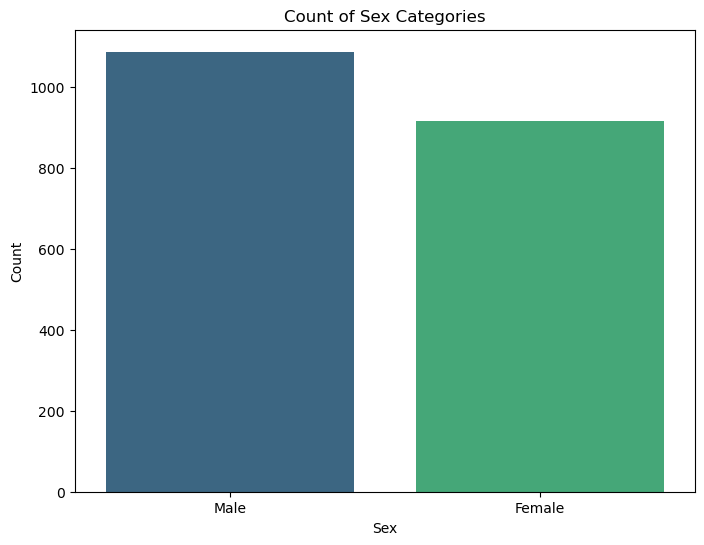

In [8]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')
plt.title('Count of Sex Categories')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

In [9]:
df["Marital status"].value_counts()

Marital status
0    1007
1     993
Name: count, dtype: int64

/var/folders/8t/glsx5ls50qqbbbhkvwpkhdnc0000gn/T/ipykernel_36098/1028214742.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='viridis')


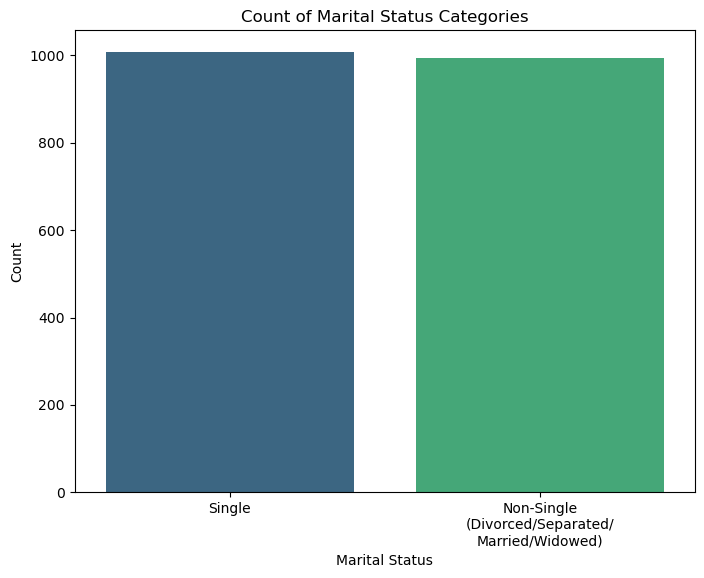

In [10]:
marital_status_counts = df['Marital status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, palette='viridis')
plt.title('Count of Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Single', 'Non-Single\n(Divorced/Separated/\nMarried/Widowed)'])
plt.show()

In [11]:
df["Age"].value_counts()

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
65     12
58     12
55     10
67     10
56     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
70      3
73      3
18      3
75      2
72      1
76      1
Name: count, dtype: int64

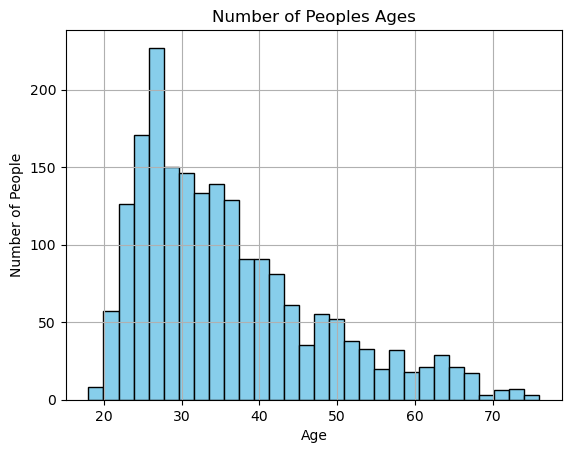

In [12]:
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
 
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of Peoples Ages')
plt.grid(True)
 
plt.show()

In [13]:
df["Education"].value_counts()

Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

/var/folders/8t/glsx5ls50qqbbbhkvwpkhdnc0000gn/T/ipykernel_36098/3077197549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')


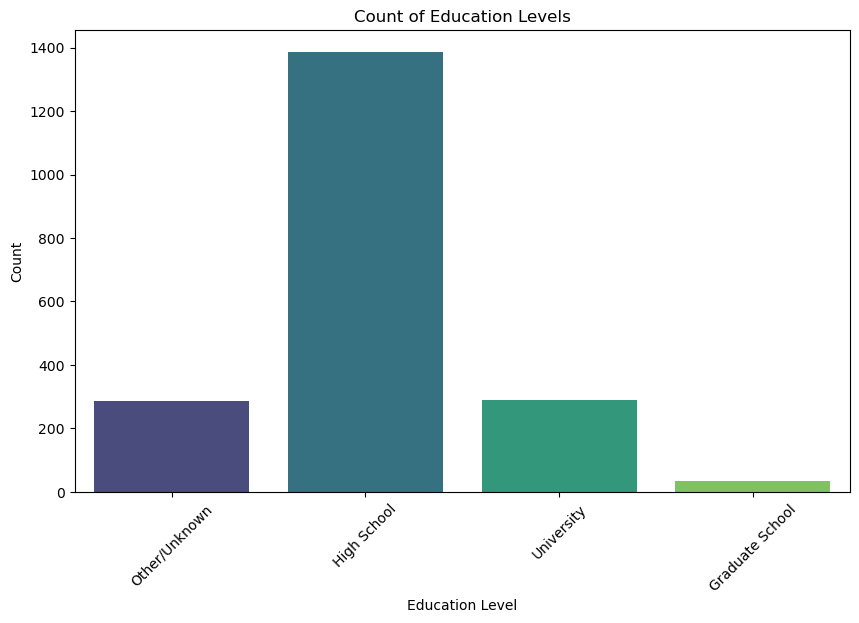

In [14]:
education_counts = df['Education'].value_counts()

education_labels = ['Other/Unknown', 'High School', 'University', 'Graduate School']

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.title('Count of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=education_labels, rotation=45)
plt.show()

In [15]:
df["Income"].value_counts()

Income
83687     2
113619    2
126906    2
120262    2
214364    2
         ..
121400    1
90051     1
111862    1
162772    1
68416     1
Name: count, Length: 1982, dtype: int64

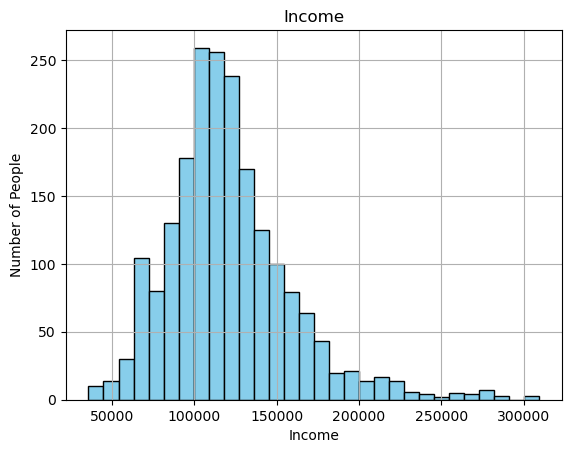

In [16]:
plt.hist(df['Income'], bins=30, color='skyblue', edgecolor='black')
 
plt.xlabel('Income')
plt.ylabel('Number of People')
plt.title('Income')
plt.grid(True)
 
plt.show()

In [17]:
df["Occupation"].value_counts()

Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

/var/folders/8t/glsx5ls50qqbbbhkvwpkhdnc0000gn/T/ipykernel_36098/1909882624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')


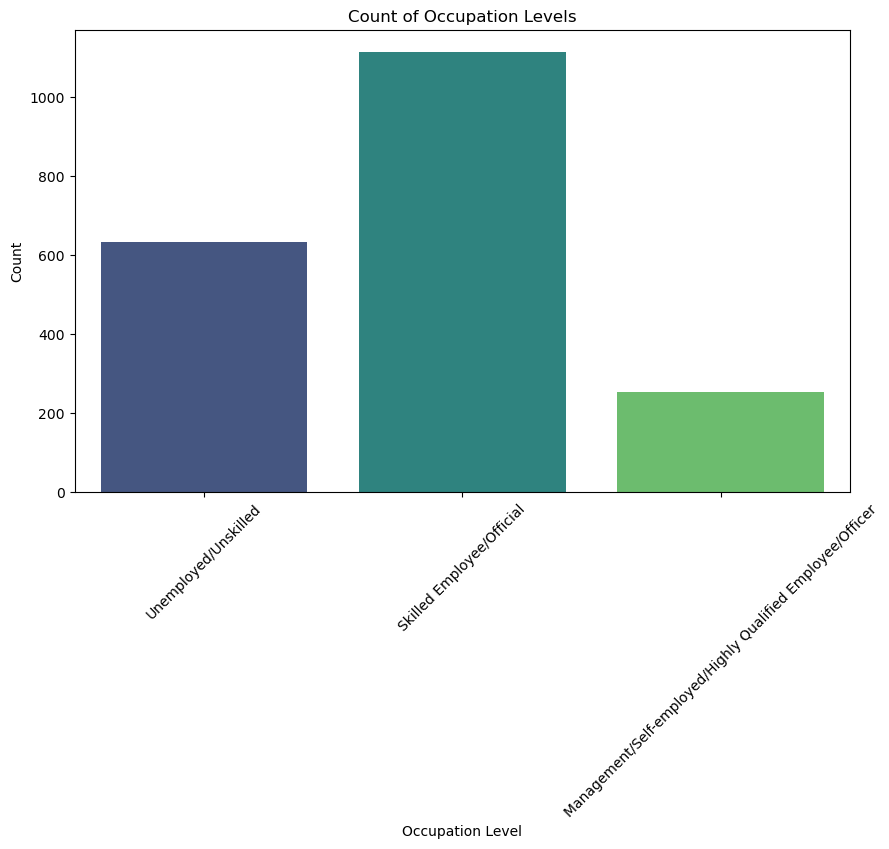

In [18]:
occupation_counts = df['Occupation'].value_counts()
occupation_labels = ['Unemployed/Unskilled', 'Skilled Employee/Official', 'Management/Self-employed/Highly Qualified Employee/Officer']

plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')
plt.title('Count of Occupation Levels')
plt.xlabel('Occupation Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=occupation_labels, rotation=45)
plt.show()

In [19]:
df["Settlement size"].value_counts()

Settlement size
0    989
1    544
2    467
Name: count, dtype: int64

/var/folders/8t/glsx5ls50qqbbbhkvwpkhdnc0000gn/T/ipykernel_36098/3257437076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=settlement_size_counts.index, y=settlement_size_counts.values, palette='viridis')


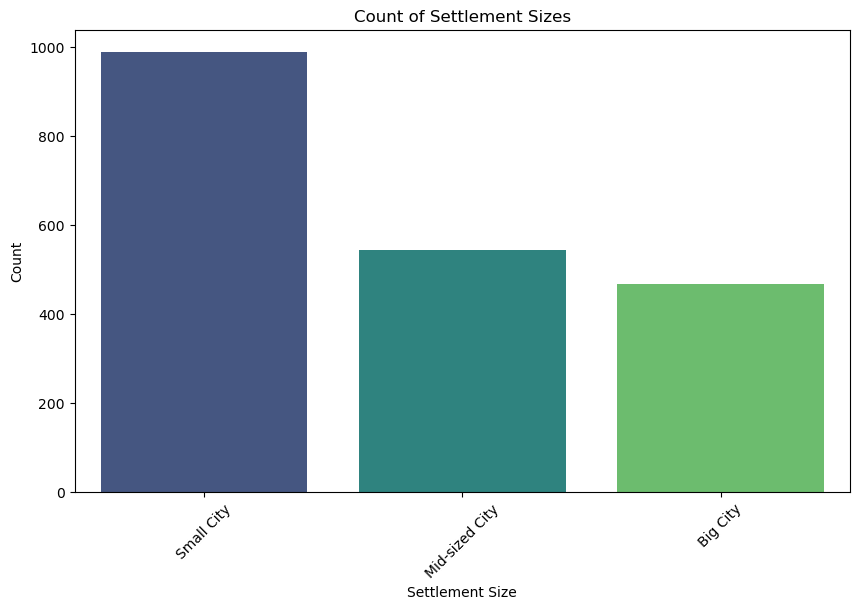

In [20]:
settlement_size_counts = df['Settlement size'].value_counts()
settlement_size_labels = ['Small City', 'Mid-sized City', 'Big City']

plt.figure(figsize=(10, 6))
sns.barplot(x=settlement_size_counts.index, y=settlement_size_counts.values, palette='viridis')
plt.title('Count of Settlement Sizes')
plt.xlabel('Settlement Size')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=settlement_size_labels, rotation=45)
plt.show()

#### Analysis Output

People living in small cities are double of how many people are living in mid-sized cities and big cities. 

Most people are skilled employee/officials with the least number of people being in management, self-employed, highly qualified employee/officier. 

The dataset appears to represent a diverse sample in terms of age, income and educational background. Roughly equal proportions of males and females are represented, and about half of the sample is single. There is a significant variation in income levels, with a notable standard deviation, suggesting a diverse economic background within the dataset. 

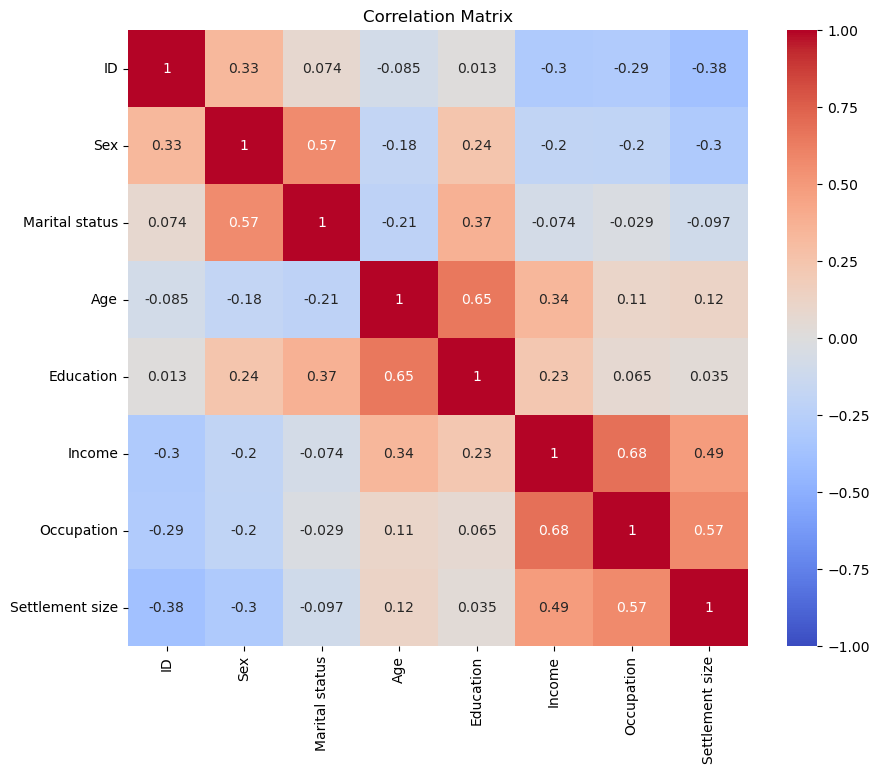

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


#### Correlation Analysis Output

In this correlation, the feature 'Age' and 'Education' has a positive correlation of 0.65, suggesting that higher levels of education are associated with older age, reflecting cumulative educational experiences over time. 
'Occupation' and 'Income' also has a positive correlation of 0.68, indicating that individuals with higher income tend to have positions or professions that are associated with higher earnings. This correlation implies that occupation can be a significant predictor of income.

There is a negative correlation of -0.3 between the features 'Settlement size' and 'Sex'. This indicates that there are fewer males in larger settlement sizes. This implies demographic pattern where males are more relatively more concentrated in smaller settlement areas than females.
There is also a negative correlation of -0.19 between 'Income' and 'Sex'. On average, males tend to have a slightly lower income compared to females in the dataset. This could reflect broader societal trends such as occupational choices.

The correlation between 'Marital Status' and "Education' indicates a moderate positive correlation. This relationship displays that individuals with higher levels of education are more likely to be non-single (married, divorced, widowed), which suggests that education might influence marital status, possibly due to socioeconomic factors or personal choices. 

## Cluster Analysis

### K-Means Clustering

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [24]:
features = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_
print(df.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  Cluster  
0                2        0  
1                2        2  
2                0        1  
3                1        0  
4                1        0  


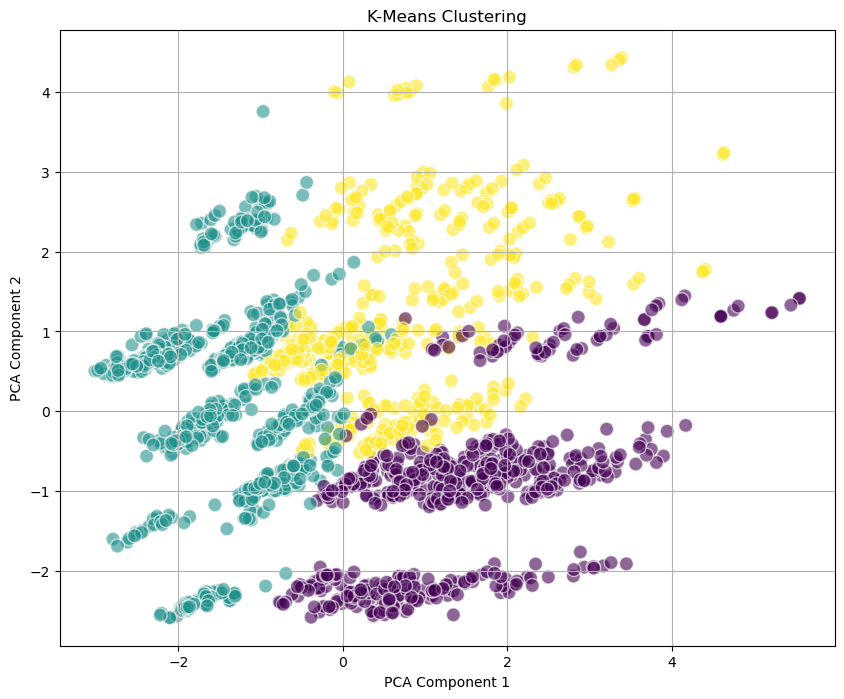

In [25]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.6, edgecolors='w')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

#### Analysis Output

Above visualisation is of a K-Means clustering results using Principal Component Analysis (PCA) for dimensionality reduction. This means the plot does not capture all the information from the original higher-dimensional space but still provides a good approximation. The PCA are linear combinations of the original geatures, so each axis represents a combination of multiple features. 

There are three clusters, as indicated by the three difference colours. Each point on the plot represents a data sample from the dataset. The clusters appear to be fairly well-separated, indicating that K-Means algorithm has effectively partitioned the data into three distinct groups. The clusters overlap slightly, especially the yellow and purple clusters, which could suggest some similarity or gradual transition between the data points. 



In [26]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000008e+08  0.009174        0.000000  39.611621   0.814985   
1        1.000013e+08  0.677536        0.576087  32.957729   0.990338   
2        1.000008e+08  0.669884        0.996139  35.951737   1.395753   

                Income  Occupation  Settlement size      PCA1      PCA2  
Cluster                                                                  
0        140938.695719    1.188073         1.246177  1.374323 -1.029498  
1         94818.583333    0.294686         0.010870 -1.438431  0.119907  
2        137500.277992    1.158301         1.262548  0.564120  1.108124  
Silhouette Score: 0.231


#### Analysis Output

**Cluster 0:** There is an equal distribution of males (48.4%) and females (51.6%). 66.2% are non-single with an average age of 55.67 years, indicating an older population. The average education level is around 2.1, which corresponds to university graduates. This cluster also has the highest average income of $150,936.38, with an average occupation category being 1.12, suggesting a mix of highly skilled employees/officials and management/self-employed/highly qualified employees. The average settlement size is 1.09, indicating that most individuals live in mid-sized cities. 

**Cluster 1:** In this cluster, female is predominant at 99.5%. Most individuals are single at 87.1%, with an average age of 35.41 years and education level at 0.7, which corresponds to high school. The average income for this cluster is $126,037.97, with an average occupation category of 0.9, referring to a mix of unemployed/unskilled and skilled employees/officials. The average settlement size is 1.02, indicating that most individuals live in a mid-sized city. 

**Cluster 2:** This cluster is predominantly male at 89.7%, with 80.8% being non-single (married, divorced, separated, or widowed). This cluster has the youngest average age of 30.13 years, with also the lowest average income of $104,168.26. The average occupation category is 0.58, indicating most are unemployed/unskilled individuals. The average settlement size is 0.34, suggesting that most individuals live in small cities. 

**Silhouette Score: 0.272** 

This score indicates that the clusters are moderately distinguishable but not highly distinct. There are some overlap between clusters, which could suggest similarities in certain features. 

**Implications**

**Cluster 0:** Can be targeted for products/services that cater to an older, higher-income and well-educated demographic

**Cluster 1:** Represents a market of younder, predominantly female individuals with moderate income.

**Cluster 2:** Represents younger males with lower income and less stable occupations, living in smaller cities, potentially requiring more budget-friendly options. 

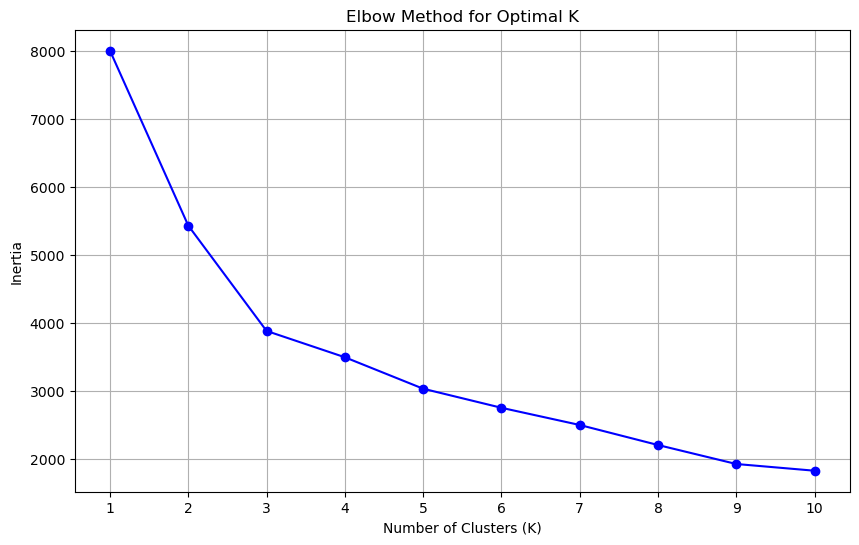

In [27]:
X = df[['Age', 'Income', 'Education', 'Settlement size']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Hierarchical Clustering

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

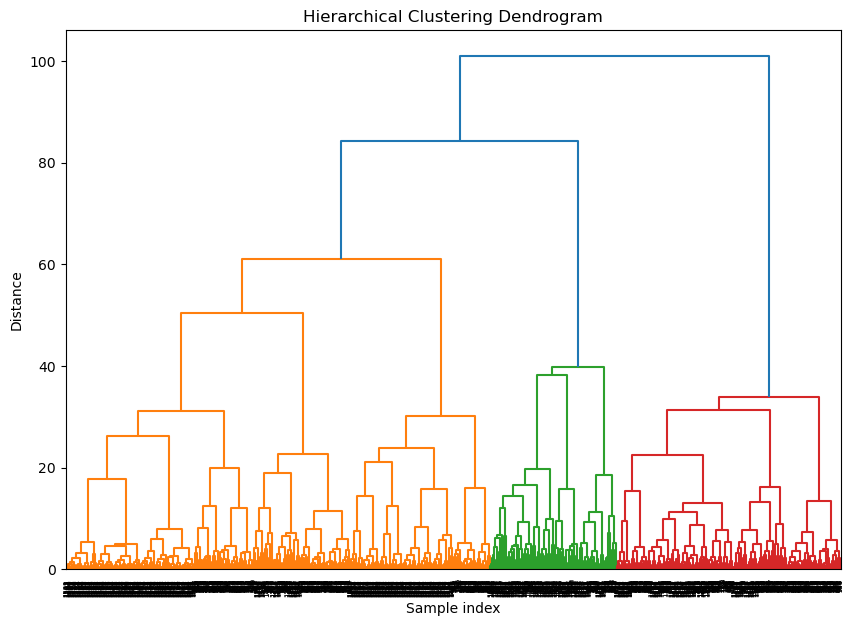

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [30]:
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')
df['Cluster'] = clusters

print(df.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  Cluster      PCA1      PCA2  
0                2        2  2.514746  0.834122  
1                2        3  0.344935  0.598146  
2                0        3 -0.651063 -0.680093  
3                1        1  1.714316 -0.579927  
4                1        1  1.626745 -0.440496  


#### Analysis Output

**Cluster 1 (ID 100000002):** This individual is a young single female (aged 22) with a high school education and a relatively high income of $150,773. They reside in a mid-city and is classified under Cluster 1 based on their PCA1 and PCA2 values. 

**Cluster 2 (ID 100000001):** This person is a single older male (aged 67) with a university education and an income of $124,670, living in a big city. 

**Cluster 3 (ID 100000003, 100000004, 100000005):** These individuals share similarities such as being a single male and having a high school education. They have varying incomes ranging from $89,210 to $171,565. They reside in different settlement sizes but are grouped together due to their characteristics. 

#### How the two clusters identified by the two techniques compare?

**K-Means Clustering**

This method partitions data into K clusters where each cluster is defined by its centroid. Each point belongs to exactly one cluster and is efficient for large datasets. 

**K-Means results:** Identified three distinct clusters based on income, age and education levels. 
Cluster 1: High-income professionals in urban areas.
Cluster 2: Middle-income families in suburban areas.
Cluster 3: Low-income retirees in rural areas.

**Hierarchical Clustering**

This method forms a hierarchy of clusters by either agglomerative (bottom-up) or divisive (top-down). It provides a dendrogram showing nested clusters at different levels of similarity. 

**Hierarchical results:** Showed a dendrogram displaying different individuals with different settlement, income and education levels. 

#### Conclusion

Comparing clusters identified by different techniques provides a comprehensive understanding of how segmentation approaches align or differ in capturing patterns in the data. Each method has its strengths and limitations and leveraging multiple techniques can enhance confidence in segmentation results, leading to more informed decision-making in various applications such as marketing and customer service. 